
# Project: Investigate a dataset of TmDb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    This analysis seek to analyse the TmDb movies dataset. this dataset shows the movies popular overtime and their respective budget. Hence, this analysis will centre on answering the following questions:
    1) Extract the genre of the movies from genres column using split function
    2) identify the different genre in the dataset
    3) Identify the unique years in the dataset
    4) The most popular movie genre
    5) Which genres are most popular from year to year? 
    6) What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb_movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Define a function that will call df.info( summary of columns in the dataset) named dataset_info

In [3]:
def dataset_info():
    return df.info()
   

Testing the function "dataset_info"

In [4]:
dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

## The next two cells below will check how many duplicate and isnull values there is in the dataset.

In [6]:
df.duplicated().sum()

1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning of all nan, duplicates and all columns not needed for the analysis

## The cell below will drop all duplicated values in the dataset.

In [8]:
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


## Drop columns with too much missing values and not relevant to the analysis of the dataset

In [9]:
df.drop(columns=['homepage', 'cast', 'tagline', 'keywords', 'production_companies'], inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Drop nan values in the dataset

In [10]:
df.dropna(inplace=True)
dataset_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10794 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10794 non-null  int64  
 1   imdb_id         10794 non-null  object 
 2   popularity      10794 non-null  float64
 3   budget          10794 non-null  int64  
 4   revenue         10794 non-null  int64  
 5   original_title  10794 non-null  object 
 6   director        10794 non-null  object 
 7   overview        10794 non-null  object 
 8   runtime         10794 non-null  int64  
 9   genres          10794 non-null  object 
 10  release_date    10794 non-null  object 
 11  vote_count      10794 non-null  int64  
 12  vote_average    10794 non-null  float64
 13  release_year    10794 non-null  int64  
 14  budget_adj      10794 non-null  float64
 15  revenue_adj     10794 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB




### Research Question 1 
    1) Extract the genre of the movies from genres column using split function
    2) identify the different genre in the dataset
    3) Identify the unique years in the dataset

**1)** Extract the genre of the movies from genres column using split function

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df["movie_genre"] = df["genres"].str.split("|", expand=True)[0]
df.movie_genre.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

**2)** identify the different genre in the dataset

In [12]:
df['movie_genre'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

   **3)** Identify the unique years in the dataset

In [13]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

### Research Question 2  
       4) The most popular movie genre
        5) Which genres are most popular from year to year? 
        6) What kinds of properties are associated with movies that have high revenues?

   **4)** The most popular movie genre
   
   The cell below will answer the question to which movie genre is the most popular over the years.

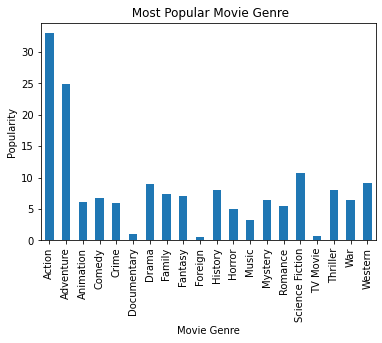

In [14]:

df.groupby('movie_genre')['popularity'].max().plot(kind='bar')
plt.title(' Most Popular Movie Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Popularity');

### From the bar chart above where popularity is plotted against Movie genre to identify the genre that is most popular over the years. It is evident that Action Movies is the most popular among viewers which is followed behind by adventure Movies. This two Movie genre are far the most popular according to the above chart

**5)** Which genres are most popular from year to year? 

In [15]:
df.groupby('release_year')[['popularity', 'movie_genre']].max()


,popularity,movie_genre
release_year,,
1960,2.610362,Thriller
1961,2.631987,Western
1962,3.170651,Western
1963,2.508235,Romance
1964,3.153791,Western
1965,1.910465,War
1966,1.227582,Western
1967,2.550704,Western
1968,3.309196,Western


## Relationships between the columns

The cell below will check the relationships between the columns.

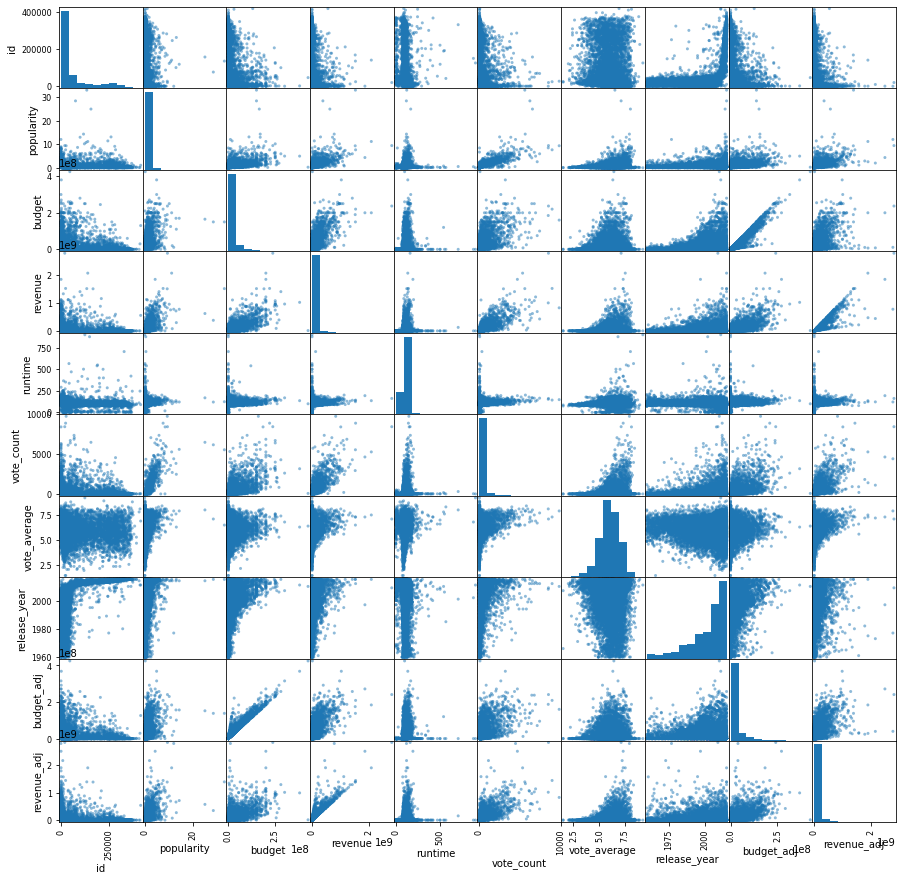

In [16]:
pd.plotting.scatter_matrix(df, figsize = (15,15));


### From the above scatterplot, it shows that there is a relation between Revenue with other columns such as budget and vote counts. Therefore we will show the relationship in a sctterplots below

    6) What kinds of properties are associated with movies that have high revenues?
    
This cells below will create a function that will return title ,xlabel, and ylabel in case of repititive work. Also plot the columns that are in correlation with revenue

In [17]:
def plot_desc(Title,xLabel,yLabel):
    return (plt.title(Title), plt.xlabel(xLabel), plt.ylabel(yLabel))

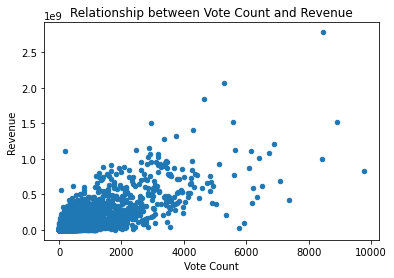

In [18]:
df.plot(x="vote_count", y="revenue", kind="scatter")
plot_desc("Relationship between Vote Count and Revenue", "Vote Count", "Revenue");

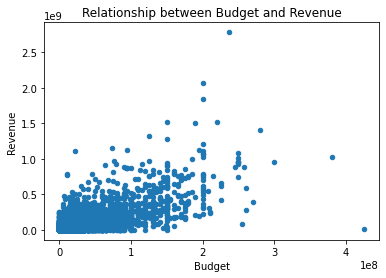

In [19]:
df.plot(x="budget", y="revenue", kind="scatter")
plot_desc("Relationship between Budget and Revenue", "Budget", "Revenue");

### CONCLUSIONS

        The anaylsis on the dataset have been able to justify some results after detailed asssessment on TmDb movies dataset. In summary, below are the observations:
   **1)** There are 20 differents major genres of movie.
   
   **2)** The most popular movie genre from 1960 to 2015 is Action Movies followed closely by Adventure movies.
   
   **3)** There is a positive relationship between revenue, budget and votecounts, which means that revenue is positively dependent on budget and votecounts.

### LIMITATIONS
The limitations in this analysis are:

     1) It requires a lot of thinking and time to determine what to make out of the dataset.
     2) It was a challenge to split and extract a string from a column (genres) and set up another column(movie_genre) with the extacts in the datafarame.
      3)Additional learning was required to finish the analysis of this dataset

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295